In [1]:
pip install alpha_vantage

     -------------------------------------- 324.5/324.5 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 96.4/96.4 kB 552.3 kB/s eta 0:00:00
     -------------------------------------- 56.9/56.9 kB 739.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Set up the API endpoint URL and parameters
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_INTRADAY',
    'symbol': 'AAPL',
    'interval': '5min',
    'apikey': 'PSAXD5PQOVJNQK7E'
}

# Send a GET request to the Alpha Vantage API and parse the response
response = requests.get(url, params=params)
data = response.json()['Time Series (5min)']
df = pd.DataFrame(data).T

# Convert the data to numerical values
df = df.apply(pd.to_numeric)

# Create the feature and target variables
X = df[['1. open', '2. high', '3. low', '5. volume']]
y = df['4. close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Use the model to make predictions on new data
params['symbol'] = 'GOOGL'
response = requests.get(url, params=params)
data = response.json()['Time Series (5min)']
df = pd.DataFrame(data).T
df = df.apply(pd.to_numeric)
X_new = df[['1. open', '2. high', '3. low', '5. volume']]
y_new = model.predict(X_new)
print(f'Predicted Close Price: {y_new[-1]:.2f}')


Mean Squared Error: 0.01
Predicted Close Price: 104.58


In [3]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Set up the API endpoint URL and parameters
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_INTRADAY',
    'symbol': 'AAPL',
    'interval': '5min',
    'apikey': 'PSAXD5PQOVJNQK7E'
}

# Send a GET request to the Alpha Vantage API and parse the response
response = requests.get(url, params=params)
data = response.json()['Time Series (5min)']
df = pd.DataFrame(data).T

In [5]:
df

,1. open,2. high,3. low,4. close,5. volume
2023-03-23 20:00:00,159.0400,159.2200,159.0100,159.0500,3440
2023-03-23 19:55:00,159.1000,159.1500,159.0200,159.1500,2928
2023-03-23 19:50:00,159.1500,159.1900,159.1000,159.1500,1848
2023-03-23 19:45:00,159.1800,159.2400,159.1800,159.2400,1583
2023-03-23 19:40:00,159.2900,159.3200,159.2000,159.2000,2058
...,...,...,...,...,...
2023-03-23 12:00:00,160.9300,160.9350,160.3600,160.6402,728271
2023-03-23 11:55:00,160.7950,160.9900,160.7900,160.9100,443794
2023-03-23 11:50:00,160.5450,160.8262,160.3600,160.7986,475182
2023-03-23 11:45:00,160.7513,160.8900,160.4900,160.5400,560575


In [6]:
# Convert the data to numerical values
df = df.apply(pd.to_numeric)

In [7]:
df

,1. open,2. high,3. low,4. close,5. volume
2023-03-23 20:00:00,159.0400,159.2200,159.01,159.0500,3440
2023-03-23 19:55:00,159.1000,159.1500,159.02,159.1500,2928
2023-03-23 19:50:00,159.1500,159.1900,159.10,159.1500,1848
2023-03-23 19:45:00,159.1800,159.2400,159.18,159.2400,1583
2023-03-23 19:40:00,159.2900,159.3200,159.20,159.2000,2058
...,...,...,...,...,...
2023-03-23 12:00:00,160.9300,160.9350,160.36,160.6402,728271
2023-03-23 11:55:00,160.7950,160.9900,160.79,160.9100,443794
2023-03-23 11:50:00,160.5450,160.8262,160.36,160.7986,475182
2023-03-23 11:45:00,160.7513,160.8900,160.49,160.5400,560575


In [8]:
# Create the feature and target variables
X = df[['1. open', '2. high', '3. low', '5. volume']]
y = df['4. close']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.01


In [10]:
# Use the model to make predictions on new data
params['symbol'] = 'GOOGL'
response = requests.get(url, params=params)
data = response.json()['Time Series (5min)']
df = pd.DataFrame(data).T
df = df.apply(pd.to_numeric)
df

,1. open,2. high,3. low,4. close,5. volume
2023-03-23 20:00:00,105.47,105.4700,105.38,105.3800,2061
2023-03-23 19:55:00,105.34,105.3800,105.34,105.3500,2055
2023-03-23 19:50:00,105.33,105.3300,105.33,105.3300,488
2023-03-23 19:45:00,105.32,105.3599,105.32,105.3599,619
2023-03-23 19:40:00,105.25,105.2500,105.25,105.2500,639
...,...,...,...,...,...
2023-03-23 11:55:00,105.83,105.9800,105.83,105.9550,132979
2023-03-23 11:50:00,105.71,105.8400,105.54,105.8200,234469
2023-03-23 11:45:00,105.91,106.0100,105.67,105.7200,202606
2023-03-23 11:40:00,105.87,106.0300,105.77,105.9000,261320


In [11]:
X_new = df[['1. open', '2. high', '3. low', '5. volume']]
y_new = model.predict(X_new)
print(f'Predicted Close Price: {y_new[-1]:.2f}')

Predicted Close Price: 104.61


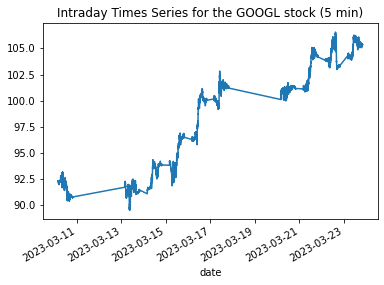

In [13]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='PSAXD5PQOVJNQK7E', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='GOOGL',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the GOOGL stock (5 min)')
plt.show()

In [14]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))